In [14]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm

In [12]:
csv_merge = "../Resources/merged2014.csv"
df_2014 = pd.read_csv(csv_merge)
df_2014.head()

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,Cluster-Group,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,...,91,53,4,High capacity,14,0.82250,0.60784,0.70078,0.8802,0.88656
1,3,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,60,79,5,High capacity,4,0.89384,0.96078,1.00000,0.8812,0.80029
2,4,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,...,0,67,14,High capacity,9,0.86436,0.78431,0.84251,1.0000,0.75057
3,5,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,26,46,13,High capacity,5,0.88966,1.00000,0.92913,0.9224,0.81751
4,6,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,...,17,48,8,High capacity,13,0.83572,0.68627,0.75590,0.9380,0.81328


In [105]:
df_2014.describe()

,Unnamed: 0,Year,ODB-Rank,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,Implementation-Accountability-Scaled,Implementation-Rank,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,43.481013,2014.0,43.835443,33.527595,50.164557,33.987342,39.050633,28.063291,44.645570,21.936709,12.898734,17.835443,40.708861,77.658228,0.551474,0.540080,0.540312,0.683861,0.430258
std,24.658104,0.0,24.415438,22.460041,25.225359,24.170598,22.020910,19.792735,24.717915,26.933604,22.188352,23.748917,20.342675,57.867640,0.229436,0.246142,0.250825,0.213540,0.270179
min,2.000000,2014.0,3.000000,0.000000,0.000000,2.000000,2.000000,6.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.132860,0.078430,0.023620,0.157800,0.008360
25%,22.500000,2014.0,23.000000,14.070000,31.500000,13.500000,21.000000,11.500000,23.500000,0.000000,0.000000,0.000000,24.500000,24.000000,0.366210,0.333330,0.318895,0.535450,0.179440
50%,43.000000,2014.0,41.000000,30.700000,46.000000,31.000000,42.000000,22.000000,44.000000,7.000000,0.000000,6.000000,45.000000,70.000000,0.545010,0.549010,0.559050,0.728200,0.357050
75%,64.500000,2014.0,64.000000,50.335000,70.000000,50.500000,54.500000,39.000000,66.000000,35.000000,15.500000,29.000000,65.000000,124.000000,0.757840,0.705880,0.724405,0.862000,0.686765
max,85.000000,2014.0,86.000000,83.700000,100.000000,92.000000,83.000000,92.000000,86.000000,100.000000,100.000000,87.000000,65.000000,186.000000,0.910340,1.000000,1.000000,1.000000,0.886560


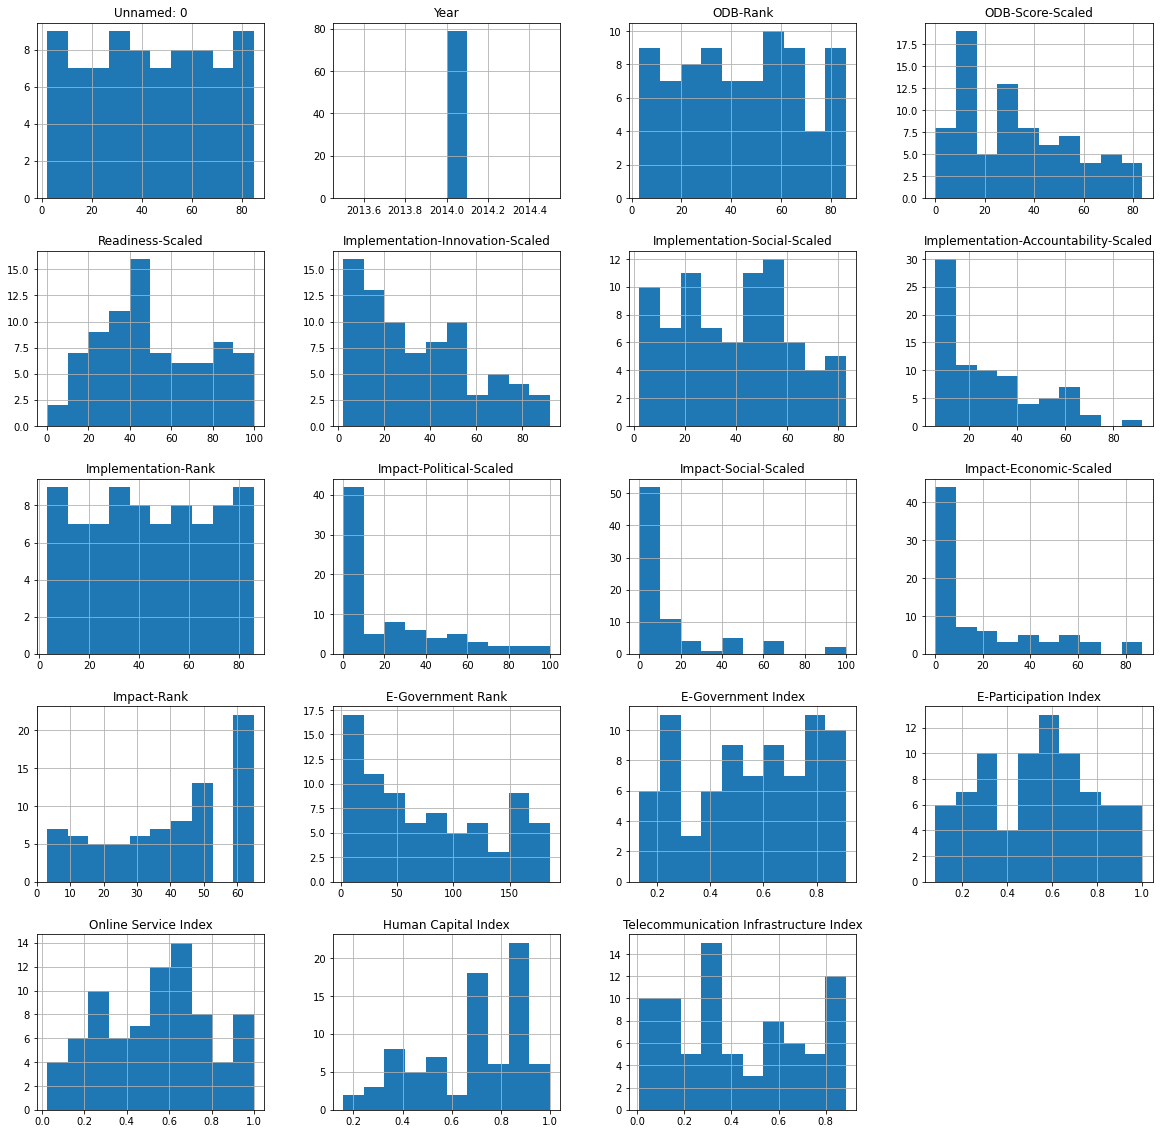

In [38]:
df_2014.hist(alpha=1, figsize=(20,20));

In [154]:
czechia = df_2014[df_2014['Country'] == "Czech Republic"]
czechia

colombia = df_2014[df_2014['Country'] == "Colombia"]
colombia

ukraine = df_2014[df_2014['Country'] == "Ukraine"]
ukraine

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,Cluster-Group,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
49,54,2014,Europe & Central Asia,UA,UKR,55,Ukraine,21.23,37,31,...,0,13,45,Capacity constrained,87,0.50316,0.43137,0.26771,0.8616,0.38016


# Egov and Online Service

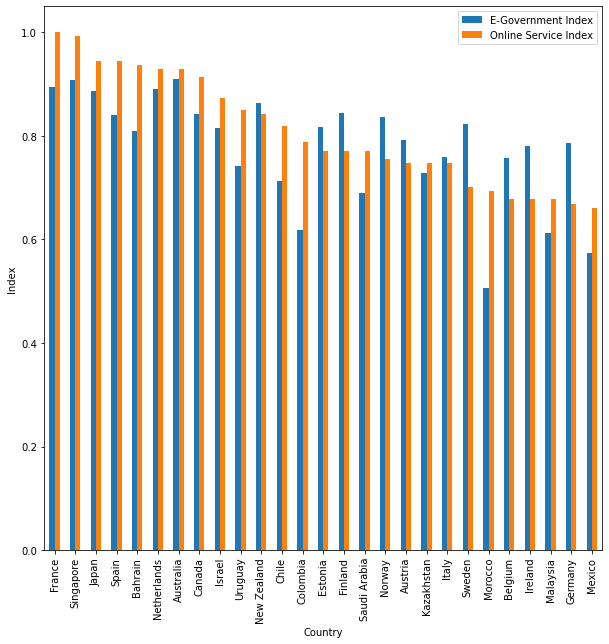

In [161]:
egov_epart = df_2014[[ 'Country', "E-Government Index", "Online Service Index"]]
egov_epart = egov_epart.sort_values(by="Online Service Index", ascending = False)
high_rank1 = egov_epart.iloc[0:27]
high_rank1 = high_rank1.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
high_rank1.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

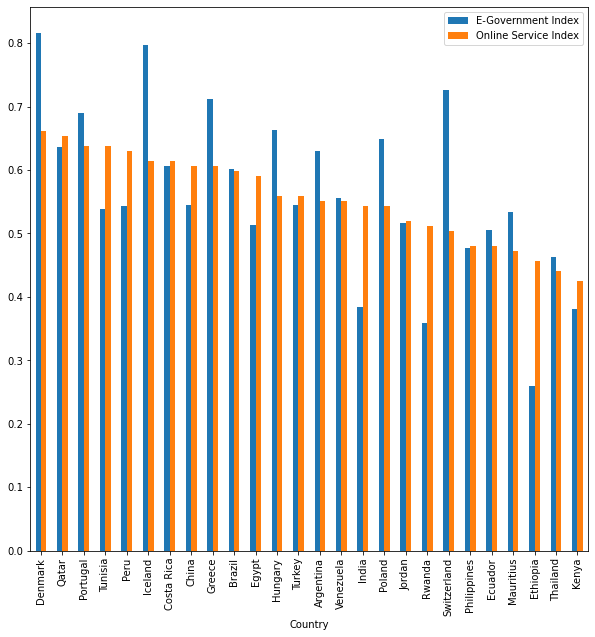

In [162]:
egov_epart = df_2014[[ 'Country', "E-Government Index", "Online Service Index"]]
egov_epart = egov_epart.sort_values(by="Online Service Index", ascending = False)
med_rank1 = egov_epart.iloc[27:53]
med_rank1 = med_rank1.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
med_rank1.plot(kind="bar", ax=ax);

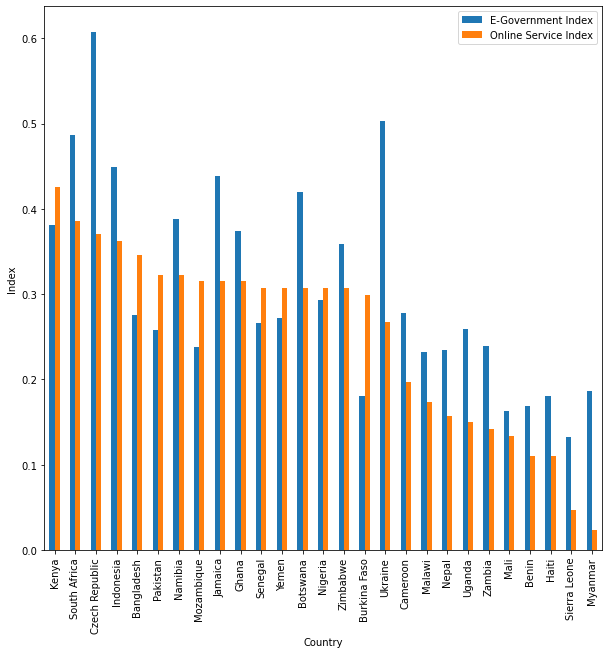

In [163]:
egov_epart = df_2014[[ 'Country', "E-Government Index", "Online Service Index"]]
egov_epart = egov_epart.sort_values(by="Online Service Index", ascending = False)
low_rank1 = egov_epart.iloc[52:80]
low_rank1 = low_rank1.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
low_rank1.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

# E Participation Breakdown


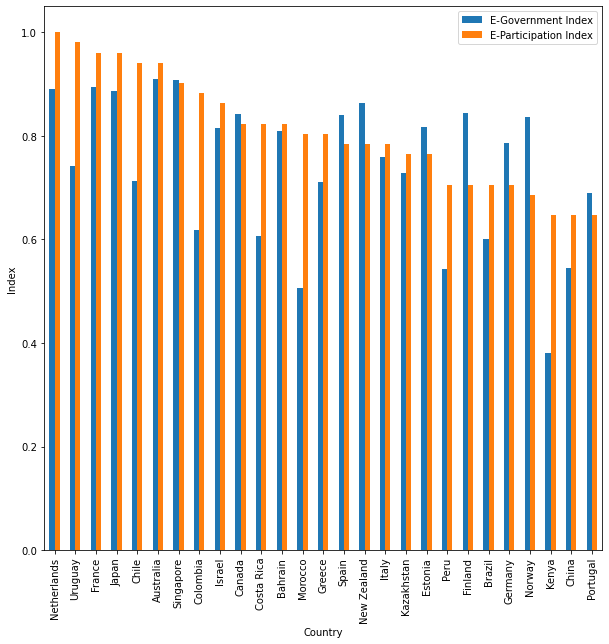

In [164]:
egov_epart = df_2014[[ 'Country', "E-Government Index", "E-Participation Index"]]
egov_epart = egov_epart.sort_values(by="E-Participation Index", ascending = False)
high_rank2 = egov_epart.iloc[0:27]
high_rank2 = high_rank2.set_index("Country")
fig, ax = plt.subplots(figsize = (10,10));
high_rank2.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

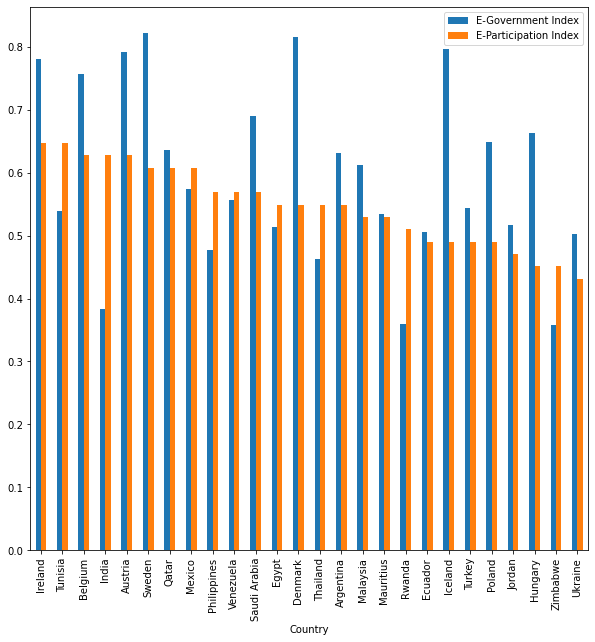

In [165]:
med_rank2 = egov_epart.iloc[27:53]
med_rank2 = med_rank2.set_index("Country")
fig, ax = plt.subplots(figsize = (10,10))
med_rank2.plot(kind="bar", ax=ax);

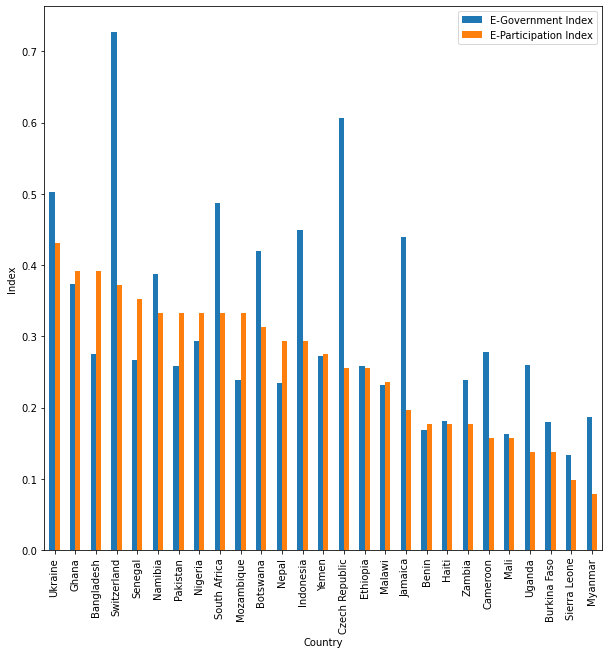

In [166]:
egov_epart = df_2014[[ 'Country', "E-Government Index", "E-Participation Index"]]
egov_epart = egov_epart.sort_values(by="E-Participation Index", ascending = False)
low_rank2 = egov_epart.iloc[52:80]
low_rank2 = low_rank2.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
low_rank2.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

In [169]:
print(med_rank1)
print(med_rank2)

             E-Government Index  Online Service Index
Country                                              
Denmark                 0.81620               0.66141
Qatar                   0.63615               0.65354
Portugal                0.68996               0.63779
Tunisia                 0.53895               0.63779
Peru                    0.54354               0.62992
Iceland                 0.79700               0.61417
Costa Rica              0.60614               0.61417
China                   0.54501               0.60629
Greece                  0.71176               0.60629
Brazil                  0.60082               0.59842
Egypt                   0.51293               0.59055
Hungary                 0.66374               0.55905
Turkey                  0.54428               0.55905
Argentina               0.63059               0.55118
Venezuela               0.55639               0.55118
India                   0.38343               0.54330
Poland                  0.64

# E participation and human capital and egov rank

In [99]:
x_axis1 = df_2014['E-Government Index']
y_axis1 = df_2014['E-Participation Index']
x_axis2 = df_2014['E-Government Index']
y_axis2 = df_2014['Human Capital Index']
x_axis3 = df_2014['E-Government Index']
y_axis3 = df_2014['Telecommunication Infrastructure Index']

In [100]:
#Linear regression x1
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression x2
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

#Linear regression x3
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_axis3, y_axis3)
regress_values3 = x_axis3 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

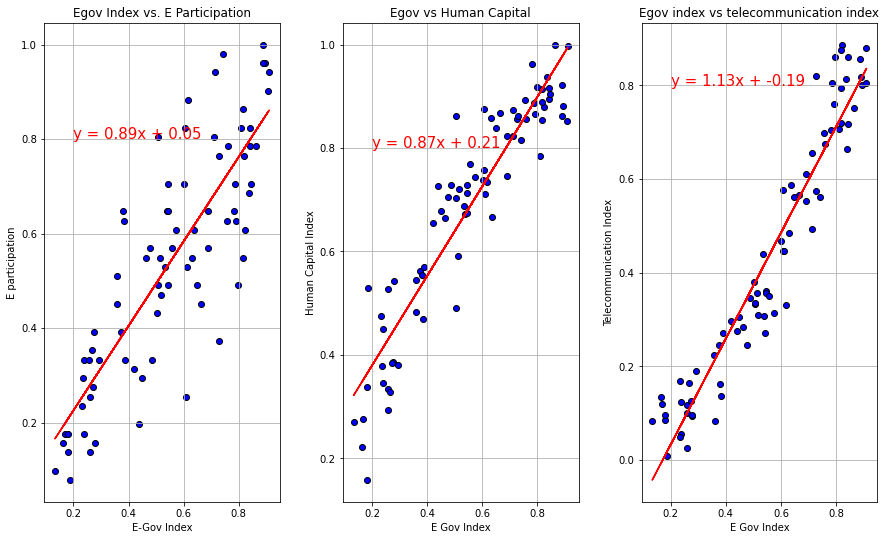

In [102]:
#Graph North and South Max temp versus latitude using multiple subplots
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (13,8), nrows=1, ncols =3);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
ax3.scatter(x_axis3, y_axis3, marker="o", facecolors="blue", edgecolors="black")

fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('E-Gov Index');
ax1.set_ylabel('E participation');
ax1.set_title("Egov Index vs. E Participation");
ax2.set_xlabel('E Gov Index');
ax2.set_ylabel('Human Capital Index');
ax2.set_title("Egov vs Human Capital");
ax3.set_xlabel('E Gov Index');
ax3.set_ylabel('Telecommunication Index');
ax3.set_title("Egov index vs telecommunication index");

#Grid
ax1.grid()
ax2.grid()
ax3.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(.2,.8),fontsize=15,color="red");
ax2.annotate(line_eq2, (.2, .8), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");
ax3.annotate(line_eq3, (.2,.8), fontsize=15, color="red")
ax3.plot(x_axis3,regress_values3,"r-");

# Readiness vs. ODB Score Scaled

In [68]:
x_axis1 = df_2014['ODB-Score-Scaled']
y_axis1 = df_2014['Readiness-Scaled']

In [69]:
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

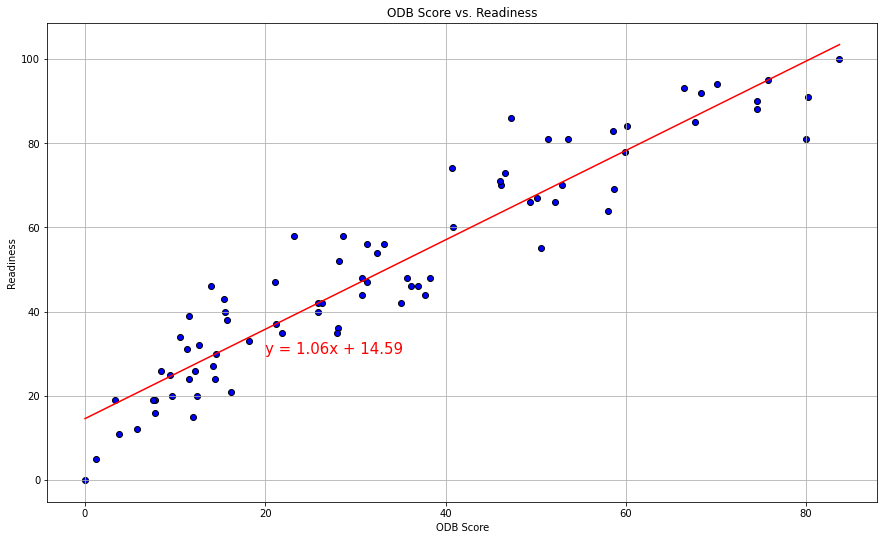

In [84]:
#Graph North and South Max temp versus latitude using multiple subplots
fig, ax1 = plt.subplots(figsize = (13,8));
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")

fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('ODB Score');
ax1.set_ylabel('Readiness');
ax1.set_title("ODB Score vs. Readiness");


#Grid
ax1.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(20,30),fontsize=15,color="red");
ax1.plot(x_axis1,regress_values1,"r-");

for index, label in enumerate(df_2014['Country']):
    ax.annotate(label, (df_2014.iloc[index, 7]+1, df_2014.iloc[index, 8]+1));
    
for i, label in enumerate(df_2014['Country']):
    ax.annotate(label, (df_2014['ODB-Score-Scaled'][i], df_2014['Readiness-Scaled'][i]));    
    

# Graphs for Egov/ODB Rank and ODBScore/EgovIndex*100

In [64]:
x_axis1 = df_2014['ODB-Rank']
y_axis1 = df_2014['E-Government Rank']
x_axis2 = df_2014['ODB-Score-Scaled']
y_axis2 = df_2014['E-Government Index'] *100

In [65]:
#Linear regression x1
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression x2
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

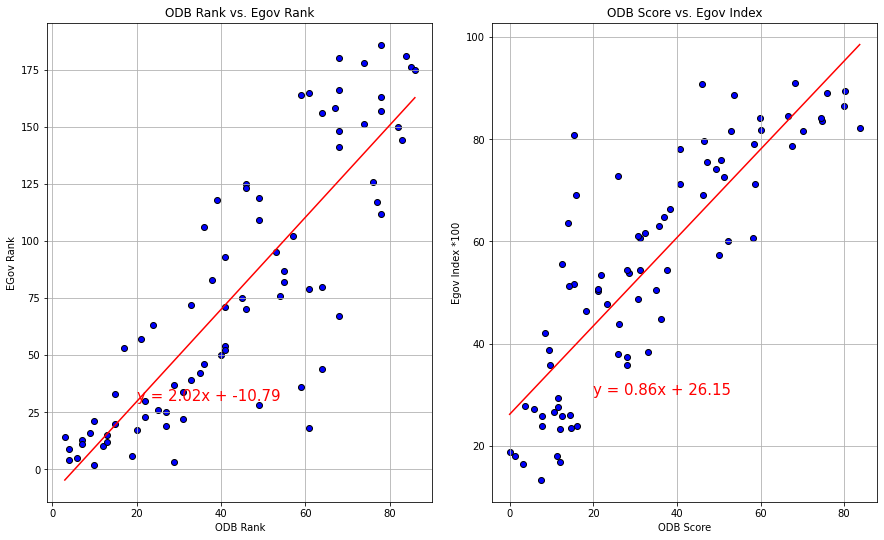

In [67]:
#Graph 
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")

fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('ODB Rank');
ax1.set_ylabel('EGov Rank');
ax1.set_title("ODB Rank vs. Egov Rank");
ax2.set_xlabel('ODB Score');
ax2.set_ylabel('Egov Index *100');
ax2.set_title("ODB Score vs. Egov Index");

#Grid
ax1.grid()
ax2.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(20,30),fontsize=15,color="red");
ax2.annotate(line_eq2, (20,30), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

# Graphs for ODB Rank and Implementation

In [135]:
#Set variables
x_axis1 = df_2014['ODB-Rank']
y_axis1 = df_2014['Implementation-Innovation-Scaled']
x_axis2 = df_2014['ODB-Rank']
y_axis2 = df_2014['Impact-Social-Scaled']
x_axis3 = df_2014['ODB-Rank']
y_axis3 = df_2014['Impact-Economic-Scaled']

In [136]:
#Linear regression x1
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression x2
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

#Linear regression x3
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_axis3, y_axis3)
regress_values3 = x_axis3 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

#testing rsquared

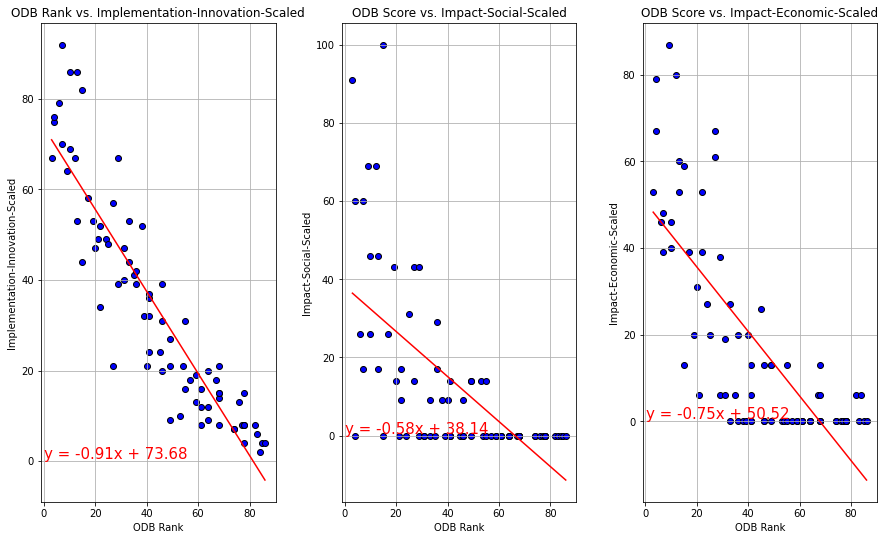

In [137]:
#Graph 
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (13,8), nrows=1, ncols =3);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
ax3.scatter(x_axis3, y_axis3, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('ODB Rank');
ax1.set_ylabel('Implementation-Innovation-Scaled');
ax1.set_title("ODB Rank vs. Implementation-Innovation-Scaled");
ax2.set_xlabel('ODB Rank');
ax2.set_ylabel('Impact-Social-Scaled');
ax2.set_title("ODB Score vs. Impact-Social-Scaled");
ax3.set_xlabel('ODB Rank');
ax3.set_ylabel('Impact-Economic-Scaled');
ax3.set_title("ODB Score vs. Impact-Economic-Scaled");

#Grid
ax1.grid()
ax2.grid()
ax3.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(.2,.5),fontsize=15,color="red");
ax2.annotate(line_eq2, (.2,.5), fontsize=15, color="red");
ax3.annotate(line_eq3, (.2,.5), fontsize=15, color="red")
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");
ax3.plot(x_axis3,regress_values3,"r-");


,Impact-Social-Scaled,Country
0,91,Sweden
1,60,France
2,0,New Zealand
3,26,Netherlands
4,17,Norway
...,...,...
74,0,Yemen
75,0,Cameroon
76,0,Mali
77,0,Haiti


# This is code from previous data - stop here.

In [6]:
csv_path1 = "../Resources/odb-rankings-2014.csv"
csv_path2 = "../Resources/odb-rankings-2016.csv"
csv_path3 = "../Resources/egov-rankings-2014.csv"
csv_path4 = "../Resources/egov-rankings-2016.csv"

In [7]:
df_egov_2014 = pd.read_csv(csv_path3)
df_egov_2014 = df_egov_2014.sort_values(by="E-Government Rank", ascending = True, ignore_index=True)

In [8]:
len(df_egov_2014["Survey Year"])

193

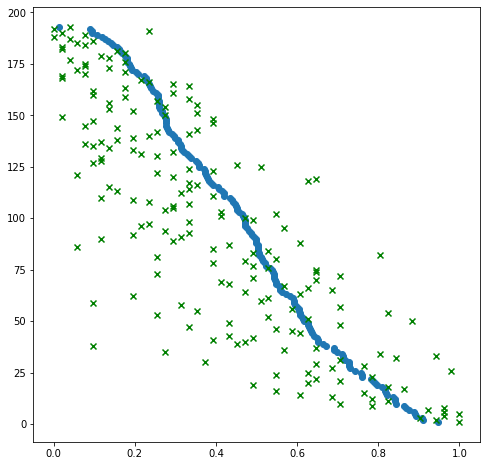

In [9]:
fig, ax = plt.subplots(figsize=(8,8));
y_axis = df_egov_2014['E-Government Rank']
x_axis1 = df_egov_2014['E-Government Index']
x_axis2 = df_egov_2014['E-Participation Index']
#x_axis3 = df_egov_2014['Online Service Index']
#x_axis4 = df_egov_2014['Human Capital Index']
#x_axis5 = df_egov_2014['Telecommunication Infrastructure Index']
ax.scatter(x_axis1, y_axis, marker = 'o')
ax.scatter(x_axis2, y_axis, marker = 'x', color='green')
# ax.scatter(x_axis3, y_axis, marker = 'v', color='red')
# ax.scatter(x_axis4, y_axis, marker = 'D', color='yellow')
# ax.scatter(x_axis5, y_axis, marker = '2', color='purple')

NameError: name 'names' is not defined

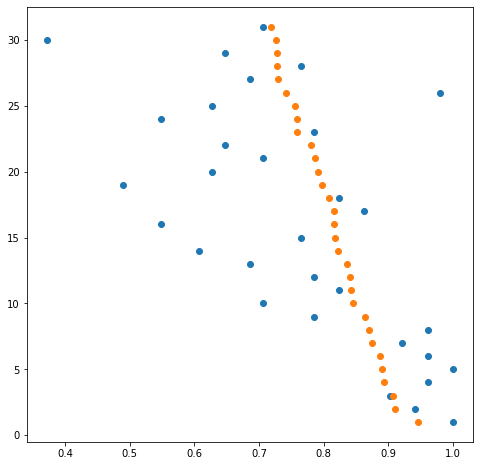

In [87]:
country_participation = df_egov_2014[["Country Name", "E-Participation Index"]]

x_axis = country_participation.iloc[0:31]['E-Participation Index']
y_axis = df_egov_2014.iloc[0:31]["E-Government Rank"]
x_axis2 = df_egov_2014.iloc[0:31]["E-Government Index"]
fig, ax = plt.subplots(figsize=(8,8));
ax.scatter(x_axis, y_axis);
ax.scatter(x_axis2, y_axis);
groups = df_egov_2014["Country Names"]
for name, groups in enumerate(names):
    ax.annotate(label, (x_axis[i], y_axis[i]));
names = df_egov_2014["Country Names"]

In [78]:
df_egov_2016 = pd.read_csv(csv_path4)
df_egov_2016 = df_egov_2016.sort_values(by="E-Government Rank", ascending = True, ignore_index=True)
df_egov_2016.head()

,Survey Year,Country Name,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,United Kingdom of Great Britain and Northern I...,1,0.91928,1.00000,1.00000,0.94018,0.81766
1,2016,Australia,2,0.91428,0.98305,0.97826,1.00000,0.76459
2,2016,Republic of Korea,3,0.89149,0.96610,0.94203,0.87947,0.85296
3,2016,Singapore,4,0.88280,0.91525,0.97101,0.83598,0.84141
4,2016,Finland,5,0.88168,0.91525,0.94203,0.94399,0.75903


In [79]:
len(df_egov_2016['Survey Year'])

193

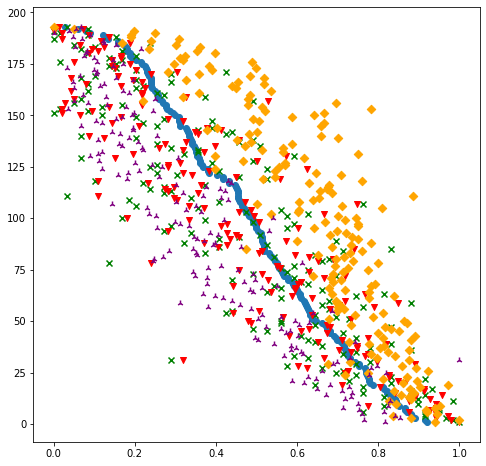

In [80]:
fig, ax = plt.subplots(figsize=(8,8));
y_axis = df_egov_2016['E-Government Rank']
x_axis1 = df_egov_2016['E-Government Index']
x_axis2 = df_egov_2016['E-Participation Index']
x_axis3 = df_egov_2016['Online Service Index']
x_axis4 = df_egov_2016['Human Capital Index']
x_axis5 = df_egov_2016['Telecommunication Infrastructure Index']
ax.scatter(x_axis1, y_axis, marker = 'o')
ax.scatter(x_axis2, y_axis, marker = 'x', color='green')
ax.scatter(x_axis3, y_axis, marker = 'v', color='red')
ax.scatter(x_axis4, y_axis, marker = 'D', color='orange')
ax.scatter(x_axis5, y_axis, marker = '2', color='purple')

In [81]:
df_odb_2014 = pd.read_csv(csv_path1)

In [82]:
odb_2014 = pd.DataFrame([df_odb_2014['Year'], df_odb_2014['Region'], df_odb_2014['ISO2'], df_odb_2014['ISO3'], df_odb_2014['ODB-Rank'], df_odb_2014['Country'], df_odb_2014['ODB-Score-Scaled'], df_odb_2014['Readiness-Scaled'],df_odb_2014['Implementation-Innovation-Scaled'], df_odb_2014["Implementation-Social-Scaled"], df_odb_2014["Implementation-Accountability-Scaled"], df_odb_2014['Implementation-Rank'], df_odb_2014['Impact-Political-Scaled'], df_odb_2014["Impact-Social-Scaled"], df_odb_2014["Impact-Economic-Scaled"], df_odb_2014["Impact-Rank"], df_odb_2014['Cluster-Group']]).transpose()
odb_2014.head()
odb_2014.to_csv(r'../Resources/odb_2014.csv', header=True, index=True)

In [83]:
len(odb_2014['Year'])

86

In [21]:
df_odb_2016 = pd.read_csv(csv_path2)
df_odb_2016.head()

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,ODB-Score-Change,Rank-Change,Readiness-Scaled,...,Readiness-Rank,Implementation-Innovation-Scaled,Implementation-Social-Scaled,Implementation-Accountability-Scaled,Implementation-Datasets_Average,Implementation-Rank,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank
0,2016,Europe & Central Asia,GB,GBR,1,United Kingdom,100.00,0.00,0.0,99,...,2,94,86,93,91.00,1,82,55,81,3
1,2016,North America,CA,CAN,2,Canada,89.54,9.19,2.0,96,...,3,87,66,86,79.67,2,63,90,43,8
2,2016,Europe & Central Asia,FR,FRA,3,France,85.13,3.48,-1.0,100,...,1,77,70,52,66.33,5,90,55,62,5
3,2016,North America,US,USA,4,United States of America,81.62,-0.27,-2.0,96,...,4,84,63,51,66.00,7,55,70,62,9
4,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,13.16,5.0,85,...,9,79,76,61,72.00,3,45,75,61,11


In [22]:
odb_2016 = pd.DataFrame([df_odb_2016['Year'], df_odb_2016['Region'], df_odb_2016['ISO2'], df_odb_2016['ISO3'], df_odb_2016['ODB-Rank'], df_odb_2016['Country'], df_odb_2016['ODB-Score-Scaled'], df_odb_2016['Readiness-Scaled'],df_odb_2016['Implementation-Innovation-Scaled'], df_odb_2016["Implementation-Social-Scaled"], df_odb_2016["Implementation-Accountability-Scaled"], df_odb_2016['Implementation-Rank'], df_odb_2016['Impact-Political-Scaled'], df_odb_2016["Impact-Social-Scaled"], df_odb_2016["Impact-Economic-Scaled"], df_odb_2016["Impact-Rank"]]).transpose()
odb_2016.head()
odb_2016.to_csv(r'../Resources/odb_2016.csv', header=True, index=True)